# MRIO Workshop

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.4 & 2 Load and clean data

### WIOT Data

In [2]:
lookup = pd.read_excel('Data/WIOT/wiot95_row_apr12.xlsx', index_col=None, header=None).iloc[6:,:4].set_index(1)
lookup[2].fillna('TOT', inplace=True)
lookup.columns = ['sector_code', 'country', 'sector']

In [3]:
lookup.head()

,sector_code,country,sector
1,,,
"Agriculture, Hunting, Forestry and Fishing",AtB,AUS,c1
Mining and Quarrying,C,AUS,c2
"Food, Beverages and Tobacco",15t16,AUS,c3
Textiles and Textile Products,17t18,AUS,c4
"Leather, Leather and Footwear",19,AUS,c5


In [4]:
# function for WIOT Data

def import_wiot(year):
    file_loc = 'Data/WIOT/wiot' + str(year)[2:] + '_row_apr12.xlsx'
    
    # import data
    df = pd.read_excel(file_loc, index_col=None, header=None).iloc[4:,2:]
    df[1644].fillna('Total', inplace=True)
    df[2].fillna('TOT', inplace=True)

    #set columns
    c1 = df.iloc[0].tolist()
    c1[0] = 'country'
    c2 = df.iloc[1].tolist()
    c2[1] = 'sector'
    df.columns = [c1, c2]

    # set index
    df = df.drop([4, 5], axis=0).set_index([('country', 'TOT'), (np.nan, 'sector')]).fillna(0)
    
    return(df)

In [5]:
year_list = []
for i in range(1995, 2010):
    year = i
    year_list.append(year)

In [6]:
wiot_list = []
for i in year_list:
    df = import_wiot(i)
    wiot_list.append(df)

In [7]:
# Z, V and Y
Z_df = []
V_df = []
Y_df = []

col_list = []
for i in range(1, 36):
    c = 'c' + str(i)
    col_list.append(c)
    
for i in range(len(wiot_list)):
    z=wiot_list[i].drop('TOT', axis=0).swaplevel(axis=1).loc[:, col_list].swaplevel(axis=1)
    Z_df.append(z)
    
    v=wiot_list[i].swaplevel(axis=0).loc[['r99', 'r60', 'r61', 'r62', 'r64', 'r69']].swaplevel(axis=1).loc[:, col_list].swaplevel(axis=1)
    V_df.append(v)
    
    y=wiot_list[i].drop('TOT', axis=0).swaplevel(axis=1)[['c37', 'c38', 'c39', 'c41', 'c42']]
    Y_df.append(y)

c:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


## 3. Load the extension data

In [11]:
# country list 

country_list = ['AUS','AUT','BEL','BGR','BRA','CAN','CHN','CYP','CZE','DEU','DNK','ESP','EST','FIN','FRA','GBR','GRC','HUN','IDN','IND','IRL','ITA','JPN','KOR','LTU','LUX','LVA','MEX','MLT',
                'NLD','POL','PRT','ROU','RUS','SVK','SVN','SWE','TUR','TWN','USA','ROW']

country = np.array(country_list)

l1 = lookup[['sector']].drop_duplicates()
l1 = l1.loc[l1.sector.str[0] == 'c']

### Energy

F_NRG

In [12]:
# function for Energy Data --> make array of vecotrs containing total energy use per year per sector

def import_energy(year, country_list):
    array_list = []
    df_list = []
    sheet = str(year)
    
    country = country_list[0]
    file_loc = 'Data/EAS-EU/' + str(country) + '_EU_May12.xls'
    # import data
    df = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0)
    df.index = df.index.droplevel(level=1)
    df = df.join(l1, how='right')
    df['energy'] = df['TOTAL']
    df['country'] = str(country)
    df = df[['country', 'sector', 'energy']].fillna(0)
       
    for i in range(1, len(country_list)):
        country = country_list[i]
        file_loc = 'Data/EAS-EU/' + str(country) + '_EU_May12.xls'
        # import data
        temp = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0)
        temp.index = temp.index.droplevel(level=1)
        temp = temp.join(l1, how='right')
        temp['energy'] = temp['TOTAL']
        temp['country'] = str(country)
        temp = temp[['country', 'sector', 'energy']].fillna(0)
        
        df = df.append(temp)
    
    df=df.set_index(['country', 'sector']).T      
    return(df)

In [13]:
#array_list = []
F_NRG_df = []

for year in range(1995, 2010):
    df_energy = import_energy(year, country_list)
    F_NRG_df.append(df_energy)

F_NRG_hh

In [15]:
def import_energy_hh(year, country_list):
    array_list = []
    df_list = []
    sheet = str(year)
    
    country = country_list[0]
    file_loc = 'Data/EAS-EU/' + str(country) + '_EU_May12.xls'
    # import data
    df = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0).iloc[-2:-1]
    df[str(country)] = df['TOTAL']
    df = df[[str(country)]].fillna(0)
    
    for i in range(1, len(country_list)):
        country = country_list[i]
        file_loc = 'Data/EAS-EU/' + str(country) + '_EU_May12.xls'
        # import data
        temp = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0).iloc[-2:-1]
        temp[str(country)] = temp['TOTAL']
        temp = temp[[str(country)]].fillna(0)
        df = df.join(temp)
        
    return(df)

In [16]:
F_NRG_hh_df = []

for year in range(1995, 2010):
    df_energy_hh = import_energy_hh(year, country_list)
    F_NRG_hh_df.append(df_energy_hh)

### Air Quality

F_GHG

In [18]:
# function for Energy Data --> make array of vecotrs containing total energy use per year per sector

def import_air(year, country_list):
    array_list = []
    df_list = []
    sheet = str(year)
    
    country = country_list[0]
    file_loc = 'Data/EAS-AIR/' + str(country) + '_AIR_May12.xls'
    # import data
    df = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0)
    df.index = df.index.droplevel(level=1)
    df = df.join(l1, how='right')
    df = df[['CO2', 'CH4', 'N2O', 'sector']]
    df['CH4'] = (df['CH4'] / 1000) * 28
    df['N2O'] = (df['N2O'] / 1000) * 265
    df['CO2e'] = df['CO2'] + df['CH4'] + df['N2O']
    df['country'] = str(country)
    df = df[['CO2e', 'country', 'sector']].fillna(0)
    
    for i in range(1, len(country_list)):
        country = country_list[i]
        file_loc = 'Data/EAS-AIR/' + str(country) + '_AIR_May12.xls'
        # import data (only from 35 sectors, remove totals)
        temp = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0)
        temp.index = temp.index.droplevel(level=1)
        temp = temp.join(l1, how='right')
        temp = temp[['CO2', 'CH4', 'N2O', 'sector']]
        # convert to kilotonnes and then construct CO2e (using 100 year GWP, AR5; https://www.ghgprotocol.org/sites/default/files/ghgp/Global-Warming-Potential-Values%20%28Feb%2016%202016%29_1.pdf)
        temp['CH4'] = (temp['CH4'] / 1000) * 28
        temp['N2O'] = (temp['N2O'] / 1000) * 265
        temp['CO2e'] = temp['CO2'] + temp['CH4'] + temp['N2O']
        temp['country'] = str(country)
        temp = temp[['CO2e', 'country', 'sector']].fillna(0)
    
        df = df.append(temp)
        
    df = df.set_index(['country', 'sector']).T
    return(df)

In [19]:
F_GHG_df = []

for year in range(1995, 2010):
    df_air = import_air(year, country_list)
    F_GHG_df.append(df_air)

F_GHG_hh

In [21]:
def import_air_hh(year, country_list):
    array_list = []
    df_list = []
    sheet = str(year)
    
    country = country_list[0]
    file_loc = 'Data/EAS-AIR/' + str(country) + '_AIR_May12.xls'
    # import data
    df = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0).iloc[-2:-1] # select only household category
    df = df[['CO2', 'CH4', 'N2O']]
    df['CH4'] = (df['CH4'] / 1000) * 28
    df['N2O'] = (df['N2O'] / 1000) * 265
    df[str(country)] = df['CO2'] + df['CH4'] + df['N2O']
    df = df[[str(country)]].fillna(0)
    
    for i in range(1, len(country_list)):
        country = country_list[i]
        file_loc = 'Data/EAS-AIR/' + str(country) + '_AIR_May12.xls'
        # import data (only from 35 sectors, remove totals)
        temp = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0).iloc[-2:-1] # select only household category
        temp = temp[['CO2', 'CH4', 'N2O']]
        # convert to kilotonnes and then construct CO2e (using 100 year GWP, AR5; https://www.ghgprotocol.org/sites/default/files/ghgp/Global-Warming-Potential-Values%20%28Feb%2016%202016%29_1.pdf)
        temp['CH4'] = (temp['CH4'] / 1000) * 28
        temp['N2O'] = (temp['N2O'] / 1000) * 265
        temp[str(country)] = temp['CO2'] + temp['CH4'] + temp['N2O']
        temp = temp[[str(country)]].fillna(0)
        df = df.join(temp)
        
    return(df)

In [22]:
F_GHG_hh_df = []

for year in range(1995, 2010):
    df_air_hh = import_air_hh(year, country_list)
    F_GHG_hh_df.append(df_air_hh)

# 4. Save matrices as files

In [33]:
'''df_list = ['Z_df', 'V_df','Y_df', 'F_NRG_df', 'F_NRG_hh_df', 'F_GHG_df', 'F_GHG_hh_df', 'country']

for df in df_list:
    np.save('Data/Matrices/' + str(mat) + '_csv.npy', eval(mat))'''

"df_list = ['Z_df', 'V_df','Y_df', 'F_NRG_df', 'F_NRG_hh_df', 'F_GHG_df', 'F_GHG_hh_df', 'country']\n\nfor df in df_list:\n    np.save('Data/Matrices/' + str(mat) + '_csv.npy', eval(mat))"

# 5. Calculating energy and emissions consumption-based accounts

For reference, use:  
http://www.see.leeds.ac.uk/teaching-resources/exercise-pages/l4-input-output-tutorial-201617/  
http://mathesaurus.sourceforge.net/matlab-numpy.html 

### 5.1. The UK's production and conumption based GHG emissions from 1995-2009

In [26]:
## Using pandas

UK=16;

UK_consumption = []
UK_production = []
for i in range(len(year_list)):
    # territorial emissions
    UK_prod = float(F_GHG_df[i]['GBR'].sum(axis=1)) + float(F_GHG_hh_df[i]['GBR'])
    UK_production.append(UK_prod)

    # consumption based emissions
    x = np.array(Y_df[i].sum(axis=1) + Z_df[i].sum(axis=1))
    for j in range(len(x)):
        if x[j]==0:
            x[j]=0.000000001 # do this to avoid trying to divide my zero later
        else:
            pass
    x = x.reshape(1435,1)
    big_x = x.repeat(len(x), axis=1)
    x_t = np.matrix.transpose(big_x)
    
    A = np.array(Z_df[i]) / x_t
    I = np.identity(len(Z_df[i]))
    L = np.linalg.inv(I-A)
    F_GHGx = np.array(F_GHG_df[i]) / (x.reshape(1, 1435))
    
    Y_t = np.matrix.transpose(np.array(Y_df[i]))
    Y_UK = np.array(Y_df[i].swaplevel(axis=1)[['GBR']]).sum(axis=1).reshape(1435, 1)

    temp = np.matmul(F_GHGx, L)
    temp = np.matmul(temp, Y_UK)
    UK_cons = temp + float(F_GHG_hh_df[i]['GBR'])
    UK_consumption.append(UK_cons[0][0])

In [31]:
UK_co2e = pd.DataFrame()
UK_co2e['Consumption'] = UK_consumption
UK_co2e['Production'] = UK_production
UK_co2e['Year'] = year_list

Text(0.5,1,'Matlab Data')

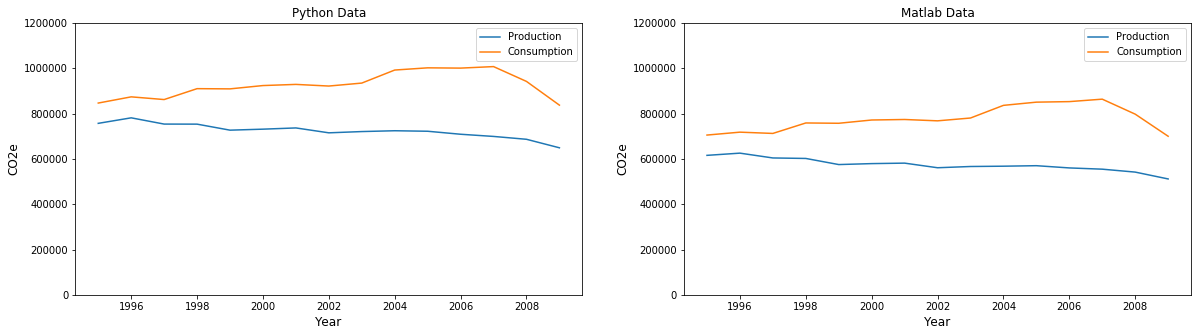

In [32]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))

UK_co2e.plot(ax=axs[0], x='Year', y='Production')
UK_co2e.plot(ax=axs[0], x='Year', y='Consumption')
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('CO2e', fontsize=12)
axs[0].set_ylim([0,1200000])
axs[0].set_title('Python Data')

check = pd.read_csv('Data/final_test.csv')
check.plot(ax=axs[1], x='Year', y='Production')
check.plot(ax=axs[1], x='Year', y='Consumption')
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('CO2e', fontsize=12)
axs[1].set_ylim([0,1200000])
axs[1].set_title('Matlab Data')